In [35]:
# Importing libraries
import pandas as pd
import csv
from matplotlib import pyplot
from numpy import arange
from scipy.optimize import curve_fit


In [15]:
# Constants
R_m = 2000    # In ohms
V_in = 5    # In V

In [16]:
# Importing data
file_path = "weights_data_copy.csv"
df = pd.read_csv(file_path)
df.head(5)

,weight_g,analog_readings_Rm,V_fsr_measured_V,V_Rm_measured_V,V_fsr_analog_V,V_Rm_analog_V,mm_fsr_resistance,anlaog_fsr_resistance
0,19,20,4.92,0.08,4.903,0.097,123000.000000,101092.783500
1,38,70,4.66,0.34,4.658,0.342,27411.764710,27239.766080
2,55,101,4.51,0.49,4.507,0.493,18408.163270,18283.975660
3,75,155,4.25,0.75,4.243,0.757,11333.333330,11210.039630
4,92,245,3.81,1.19,3.803,1.197,6403.361345,6354.218881


In [17]:
df["mm_fsr_resistance_ohms"] = ( (V_in*R_m) / df["V_Rm_measured_V"]) - R_m

In [18]:
df.head(500)

,weight_g,analog_readings_Rm,V_fsr_measured_V,V_Rm_measured_V,V_fsr_analog_V,V_Rm_analog_V,mm_fsr_resistance,anlaog_fsr_resistance,mm_fsr_resistance_ohms
0,19,20,4.920,0.080,4.903,0.097,123000.000000,101092.783500,123000.000000
1,38,70,4.660,0.340,4.658,0.342,27411.764710,27239.766080,27411.764706
2,55,101,4.510,0.490,4.507,0.493,18408.163270,18283.975660,18408.163265
3,75,155,4.250,0.750,4.243,0.757,11333.333330,11210.039630,11333.333333
4,92,245,3.810,1.190,3.803,1.197,6403.361345,6354.218881,6403.361345
5,165,413,2.970,2.030,2.982,2.018,2926.108374,2955.401388,2926.108374
6,290,551,2.295,2.705,2.307,2.693,1696.857671,1713.330858,1696.857671
7,97,240,3.830,1.170,3.827,1.173,6547.008547,6525.149190,6547.008547
8,106,258,3.750,1.250,3.740,1.260,6000.000000,5936.507937,6000.000000
9,116,270,3.690,1.310,3.681,1.319,5633.587786,5581.501137,5633.587786


Text(0.5, 1.0, 'FSR vs Weight plot')

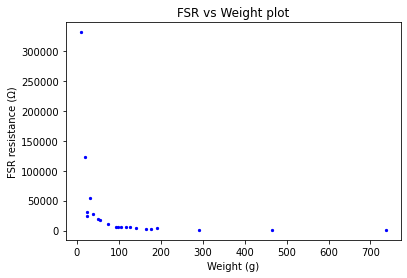

In [19]:
ax = df.plot.scatter(x= "weight_g", y="mm_fsr_resistance_ohms", s=5, c="blue");
ax.set_xlabel("Weight (g)")
ax.set_ylabel("FSR resistance (Ω)")
ax.set_title("FSR vs Weight plot")

In [20]:
# df["fsr_conductance_kS"] = 1000000 / df["fsr_resistance_ohms"]
df["weight_kg"] = df["weight_g"]/1000
df["force_N"] = df["weight_kg"]*9.8

In [21]:
df.head(500)

,weight_g,analog_readings_Rm,V_fsr_measured_V,V_Rm_measured_V,V_fsr_analog_V,V_Rm_analog_V,mm_fsr_resistance,anlaog_fsr_resistance,mm_fsr_resistance_ohms,weight_kg,force_N
0,19,20,4.920,0.080,4.903,0.097,123000.000000,101092.783500,123000.000000,0.019,0.1862
1,38,70,4.660,0.340,4.658,0.342,27411.764710,27239.766080,27411.764706,0.038,0.3724
2,55,101,4.510,0.490,4.507,0.493,18408.163270,18283.975660,18408.163265,0.055,0.5390
3,75,155,4.250,0.750,4.243,0.757,11333.333330,11210.039630,11333.333333,0.075,0.7350
4,92,245,3.810,1.190,3.803,1.197,6403.361345,6354.218881,6403.361345,0.092,0.9016
5,165,413,2.970,2.030,2.982,2.018,2926.108374,2955.401388,2926.108374,0.165,1.6170
6,290,551,2.295,2.705,2.307,2.693,1696.857671,1713.330858,1696.857671,0.290,2.8420
7,97,240,3.830,1.170,3.827,1.173,6547.008547,6525.149190,6547.008547,0.097,0.9506
8,106,258,3.750,1.250,3.740,1.260,6000.000000,5936.507937,6000.000000,0.106,1.0388
9,116,270,3.690,1.310,3.681,1.319,5633.587786,5581.501137,5633.587786,0.116,1.1368


<AxesSubplot:xlabel='force_N', ylabel='anlaog_fsr_resistance'>

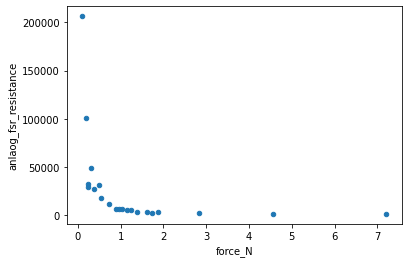

In [23]:
df.plot.scatter(x="force_N", y="anlaog_fsr_resistance")

In [37]:
df.to_csv(file_path, index= False)

y = -492.42708 * x + 0.57474 * x^2 + 69213.18533


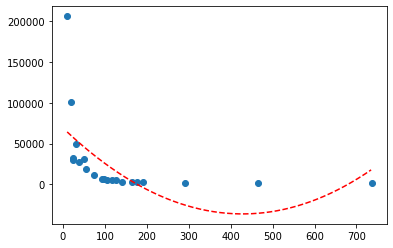

In [34]:
# Curve fitting
data = df.values
x = data[:, 0] 
y = data[:, 7]

# Objective function
def objective(x, a, b, c):
	return a*x + b*x**2 + c

# Curve fitting
coeffs, _ = curve_fit(objective, x, y)
a, b, c = coeffs
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
pyplot.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [38]:
df1 = df

In [39]:
df1.drop(16, axis=0, inplace=True)
df1.drop(6, axis=0, inplace=True)
df1.drop(12, axis=0, inplace=True)
df1.drop(13, axis=0, inplace=True)

In [40]:
df1

,weight_g,analog_readings_Rm,V_fsr_measured_V,V_Rm_measured_V,V_fsr_analog_V,V_Rm_analog_V,mm_fsr_resistance,anlaog_fsr_resistance,mm_fsr_resistance_ohms,weight_kg,force_N
0,19,20,4.920,0.080,4.903,0.097,123000.000000,101092.783500,123000.000000,0.019,0.1862
1,38,70,4.660,0.340,4.658,0.342,27411.764710,27239.766080,27411.764706,0.038,0.3724
2,55,101,4.510,0.490,4.507,0.493,18408.163270,18283.975660,18408.163265,0.055,0.5390
3,75,155,4.250,0.750,4.243,0.757,11333.333330,11210.039630,11333.333333,0.075,0.7350
4,92,245,3.810,1.190,3.803,1.197,6403.361345,6354.218881,6403.361345,0.092,0.9016
5,165,413,2.970,2.030,2.982,2.018,2926.108374,2955.401388,2926.108374,0.165,1.6170
7,97,240,3.830,1.170,3.827,1.173,6547.008547,6525.149190,6547.008547,0.097,0.9506
8,106,258,3.750,1.250,3.740,1.260,6000.000000,5936.507937,6000.000000,0.106,1.0388
9,116,270,3.690,1.310,3.681,1.319,5633.587786,5581.501137,5633.587786,0.116,1.1368
10,126,283,3.620,1.380,3.617,1.383,5246.376812,5230.657990,5246.376812,0.126,1.2348


y = -1102.66617 * x + 3.95026 * x^2 + 75640.86691


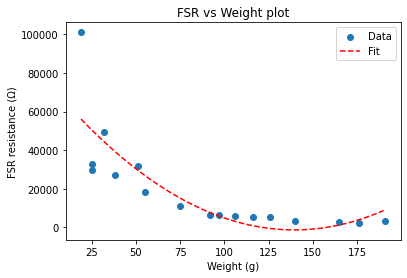

In [48]:
# Curve fitting
data = df1.values
x = data[:, 0] 
y = data[:, 7]

# Objective function
def objective(x, a, b, c):
	return a*x + b*x**2 + c

# Curve fitting
coeffs, _ = curve_fit(objective, x, y)
a, b, c = coeffs
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
pyplot.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.xlabel("Weight (g)")
pyplot.ylabel("FSR resistance (Ω)")
pyplot.title("FSR vs Weight plot")
pyplot.legend(["Data", "Fit"])
pyplot.show()